# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [57]:
%pip install iso3166

Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [59]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [61]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import date, datetime, timedelta

### Notebook Presentation

In [63]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [65]:
df_data = pd.read_csv('mission_launches_updated_2025-06-24.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [67]:
print(f"The dataframe has {df_data.shape[0]} rows and {df_data.shape[1]} columns") 

The dataframe has 7101 rows and 7 columns


In [68]:
df_data.columns

Index(['Organisation', 'Location', 'Date', 'Detail', 'Rocket_Status', 'Price',
       'Mission_Status'],
      dtype='object')

In [69]:
print(df_data.isna().values.any())
df_data.duplicated().values.any()

True


False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [71]:
try:
    df_data.drop(['Unnamed: 0'], axis=1, inplace=True)
except KeyError:
    pass

In [72]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed', utc=True).dt.tz_localize(None)
# df_data['Price'] = df_data['Price'].str.replace(',', '', regex=False).astype(float)

## Descriptive Statistics

In [74]:
df_data.describe()

,Date,Price
count,7101,"2,964.00"
mean,1993-05-07 14:35:53.493874176,67.85
min,1957-10-04 19:28:00,2.50
25%,1975-10-09 19:15:00,20.00
50%,1990-04-28 11:37:00,30.80
75%,2013-04-21 21:00:00,69.75
max,2025-06-23 21:25:00,876.00
std,NaN,96.33


In [75]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organisation    7101 non-null   object        
 1   Location        7101 non-null   object        
 2   Date            7101 non-null   datetime64[ns]
 3   Detail          7101 non-null   object        
 4   Rocket_Status   7101 non-null   object        
 5   Price           2964 non-null   float64       
 6   Mission_Status  7101 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 388.5+ KB


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [77]:
launches_by_organisations = df_data.groupby('Organisation').size().sort_values()
launches_by_organisations

Organisation
ABL SS             1
GK LS              1
Isar               1
OneSpace           1
Orienspace         1
                ... 
Roscosmos        377
CASC             525
SpaceX           525
US Air Force     549
RVSN USSR       2476
Length: 71, dtype: int64

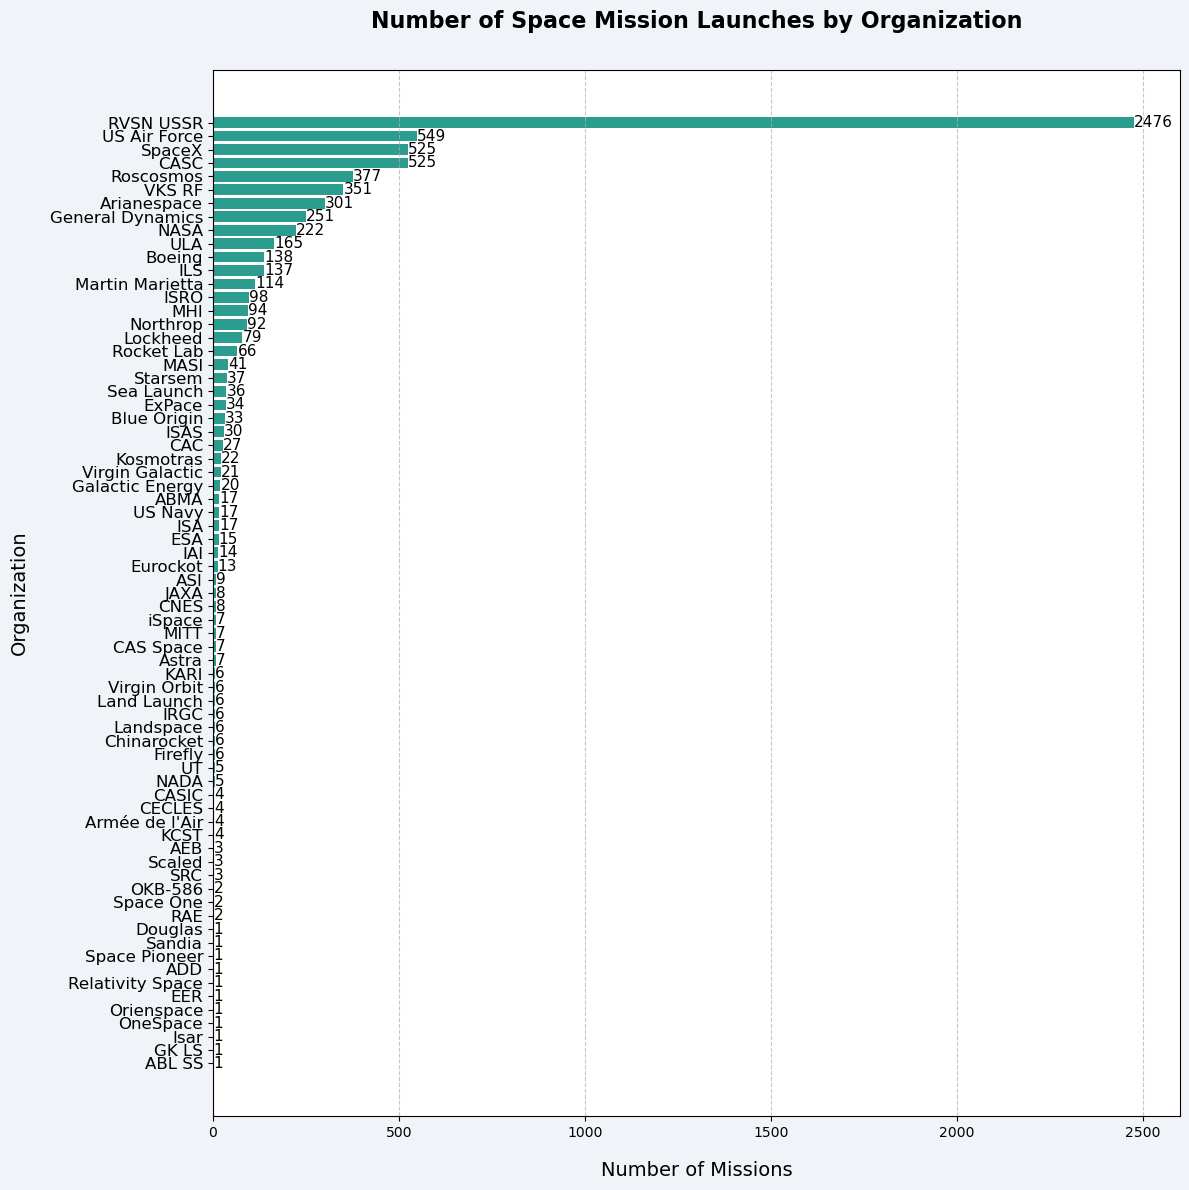

In [78]:
plt.figure(figsize=(12, 12), facecolor='#f0f4f8')

plt.barh(launches_by_organisations.index, launches_by_organisations.values, color='#2a9d8f')

plt.xlabel('Number of Missions', fontsize=14, labelpad=15)
plt.ylabel('Organization', fontsize=14, labelpad=15)
plt.title('Number of Space Mission Launches by Organization', fontsize=16, fontweight='bold', pad=30)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.yticks(fontsize=12)

for index, value in enumerate(launches_by_organisations):
    plt.text(value + 0.1, index, str(value), va='center', fontsize=11, color='black')

plt.tight_layout()
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [80]:
active_rockets_distr = df_data["Rocket_Status"].value_counts()

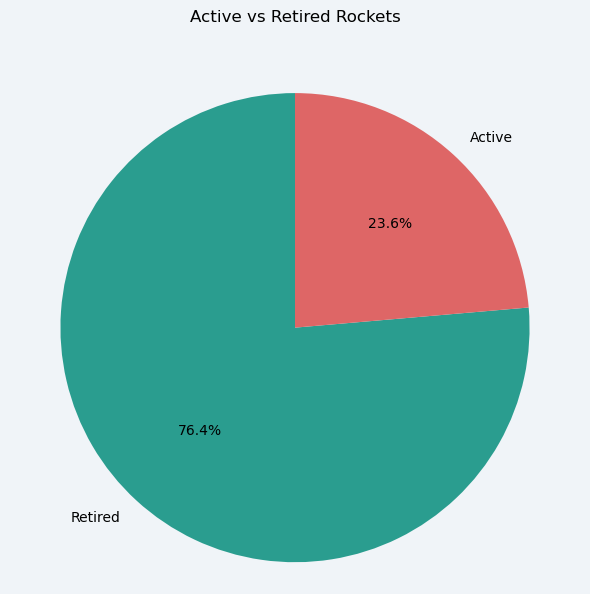

In [81]:
plt.figure(figsize=(6, 6), facecolor="#f0f4f8")

plt.pie(
    active_rockets_distr,
    labels=active_rockets_distr.index,
    autopct='%1.1f%%',
    startangle=90,
    center=(0, 0),
    colors=["#2a9d8f", "#DE6666"]
)

plt.title("Active vs Retired Rockets", y=1.08)
plt.axis('equal')
plt.tight_layout()

plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [83]:
order = ['Success', 'Prelaunch Failure', 'Failure', 'Partial Failure']
status_value_counts = df_data.Mission_Status.value_counts()
status_value_counts_order = status_value_counts.reindex(order)
status_value_counts_order

Mission_Status
Success              6398
Prelaunch Failure       8
Failure               458
Partial Failure       110
Name: count, dtype: int64

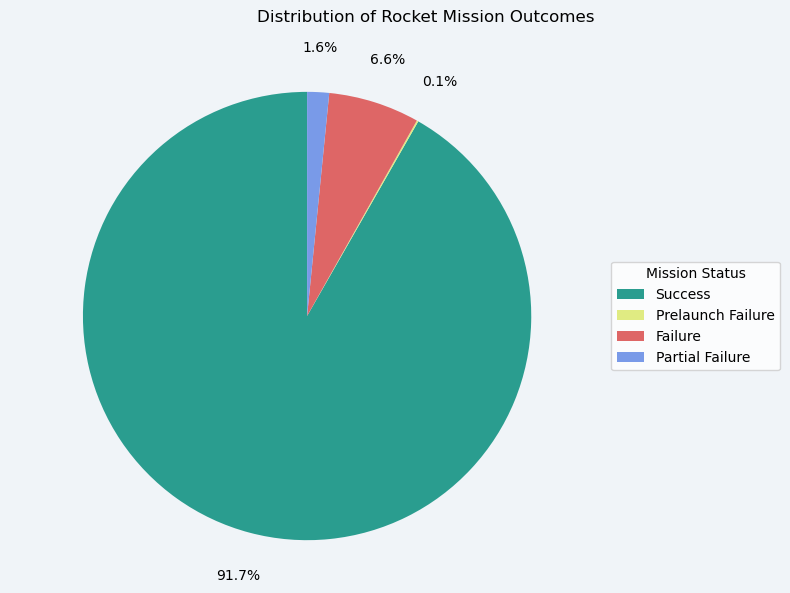

In [84]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor="#f0f4f8")

wedges, texts, autotexts = ax.pie(
    status_value_counts_order,             
    autopct='%1.1f%%',               
    startangle=90,                   
    colors=["#2a9d8f","#E0EB82", "#DE6666", "#799AE8"],
    pctdistance=1.2
)

ax.legend(
    wedges,                        
    status_value_counts_order.index,      
    title="Mission Status",          
    loc="center left",               
    bbox_to_anchor=(1, 0, 0.5, 1)    
)

ax.set_title("Distribution of Rocket Mission Outcomes", y=1.08, x=0.7)
ax.axis('equal')
plt.tight_layout()
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [86]:
df_data_clean = df_data.dropna()
df_price = df_data_clean['Price']
df_price

0       69.75
1      153.00
2       69.75
3       29.15
4      100.00
        ...  
6488    59.00
6654    63.23
6684    63.23
6700    63.23
6731    63.23
Name: Price, Length: 2964, dtype: float64

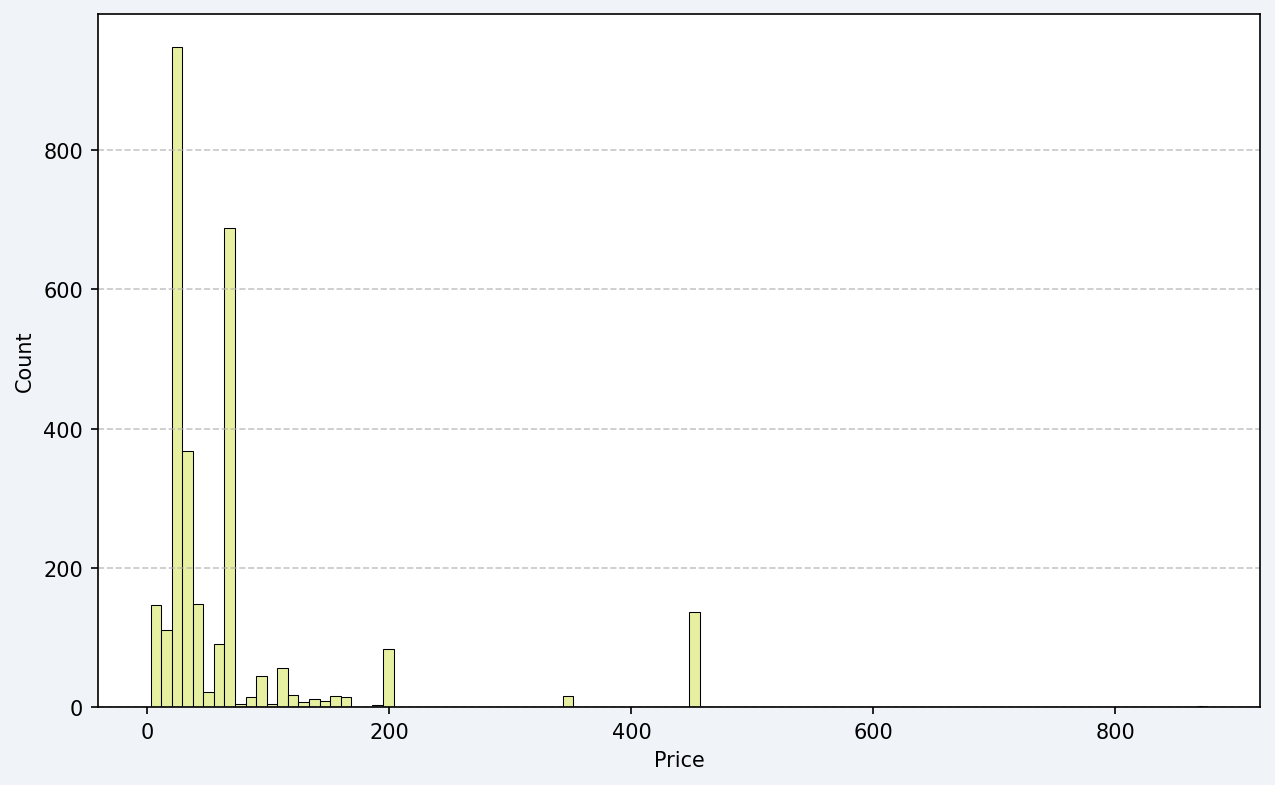

In [87]:
plt.figure(figsize=(10, 6), facecolor="#f0f4f8", dpi=150, edgecolor="black")
sns.histplot(data=df_price,
             bins=100,
             color="#E0EB82"
)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [89]:
df_data["Country"] = df_data["Location"].str.split(", ").str[-1].str.strip()
countries_update = {
    "Russia": "Russian Federation",
    "New Mexico": "USA",
    "Yellow Sea": "China",
    "Shahrud Missile Test Site": "Iran, Islamic Republic of",
    "Pacific Missile Range Facility": "USA",
    "Barents Sea": "Russian Federation",
    "Gran Canaria": "USA",
    "Iran": "Iran, Islamic Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Pacific Ocean": "USA",
    "South Korea": "Korea, Republic of",
    "China Coastal Waters": "China",
    "United Kingdom": "United Kingdom of Great Britain and Northern Ireland"
}
df_data["Country"] = df_data["Country"].replace(countries_update)
df_data["Country_Code"] = df_data["Country"].apply(lambda x: countries.get(x).alpha3)
launches_per_country = df_data.groupby(['Country', 'Country_Code']).size().reset_index(name="Launch_count")

In [90]:
fg = px.choropleth(
    launches_per_country,
    locations="Country_Code",
    hover_name="Country",
    color="Launch_count",
    color_continuous_scale="burg"
)

fg.update_layout(coloraxis_showscale=True,)
fg.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [92]:
failures_per_country = df_data[df_data.Mission_Status == "Failure"]
failures_per_country = failures_per_country.groupby(['Country', 'Country_Code']).size().reset_index(name="Failure_count")

In [93]:
fg = px.choropleth(
    failures_per_country,
    locations="Country_Code",
    hover_name="Country",
    color="Failure_count",
    color_continuous_scale="matter"
)

fg.update_layout(coloraxis_showscale=True,)
fg.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [95]:
sunburst = px.sunburst(
    df_data,
    path=["Country", "Organisation", "Mission_Status"],
    hover_name="Country",
    color_continuous_scale="plasma"
)

sunburst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [97]:
total_spent_by_organisations = df_data.dropna().groupby(["Organisation"])["Price"].sum().sort_values(ascending=False)

In [98]:
total_spent_by_organisations

Organisation
NASA               62,076.00
SpaceX             35,091.50
Arianespace        19,045.00
ULA                18,692.00
CASC               16,683.41
RVSN USSR          14,200.00
Roscosmos           6,967.06
ILS                 5,610.00
Northrop            4,566.00
MHI                 4,322.50
VKS RF              3,608.36
ISRO                2,790.00
US Air Force        1,550.92
Boeing              1,241.00
Martin Marietta       721.40
Starsem               718.00
Kosmotras             638.00
Rocket Lab            495.00
CAC                   364.08
MASI                  337.75
Lockheed              280.00
ExPace                253.10
Eurockot              169.00
JAXA                  156.00
ESA                   125.00
Firefly                90.00
Galactic Energy        87.60
Virgin Orbit           72.00
Orienspace             27.22
GK LS                  23.00
EER                    20.00
Space One              18.00
Astra                  17.50
Sandia                 15.00
R

# Analyse the Amount of Money Spent by Organisation per Launch

In [100]:
money_spent_per_launch = pd.concat([total_spent_by_organisations, launches_by_organisations], axis=1, join="inner")
money_spent_per_launch.rename(columns={0: "Launch_count"}, inplace=True)
money_spent_per_launch["Average_price_of_launch"] = money_spent_per_launch["Price"] / money_spent_per_launch["Launch_count"]
money_spent_per_launch

,Price,Launch_count,Average_price_of_launch
Organisation,,,
NASA,"62,076.00",222,279.62
SpaceX,"35,091.50",525,66.84
Arianespace,"19,045.00",301,63.27
ULA,"18,692.00",165,113.28
CASC,"16,683.41",525,31.78
RVSN USSR,"14,200.00",2476,5.74
Roscosmos,"6,967.06",377,18.48
ILS,"5,610.00",137,40.95
Northrop,"4,566.00",92,49.63


# Chart the Number of Launches per Year

In [102]:
launches_per_year = df_data.groupby(df_data['Date'].dt.year).size()

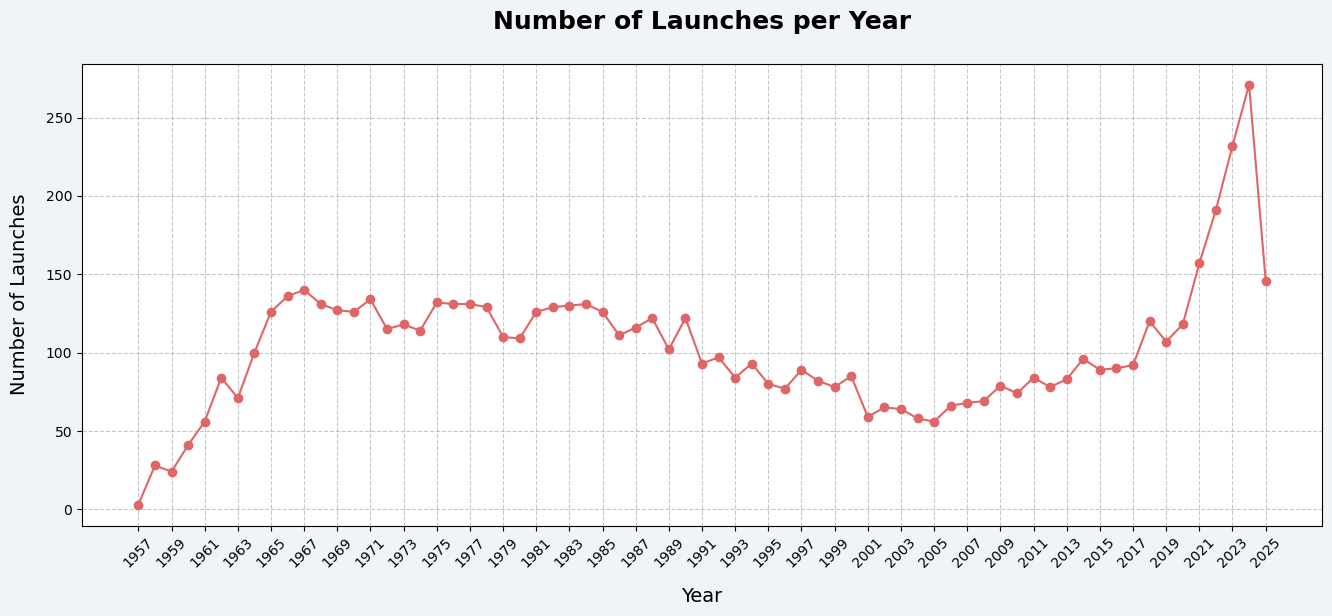

In [103]:
plt.figure(figsize=(16,6), dpi=100, facecolor='#f0f4f8')
plt.plot(launches_per_year, marker='o', linestyle='-', color='#DE6666')
plt.title('Number of Launches per Year', fontsize=18, fontweight="bold", pad=25)
plt.grid(linestyle='--', alpha=0.7)
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Number of Launches', fontsize=14, labelpad=12)
plt.xticks(launches_per_year.index[::2], rotation=45)

plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [105]:
launches_month_on_month = df_data.groupby(df_data['Date']).size().reset_index(name='Launch_count')
launches_month_on_month["Month"] = launches_month_on_month["Date"].dt.month
launches_month_on_month["Day"] = launches_month_on_month["Date"].dt.day
launches_month_on_month = launches_month_on_month.groupby(["Month", "Day"])["Launch_count"].sum().reset_index(name='Launch_count')
launches_month_on_month["Rolling_average"] = launches_month_on_month["Launch_count"].rolling(window=30).mean()
launches_month_on_month["Year"] = 2024
print(launches_month_on_month)
launches_month_on_month['Date'] = pd.to_datetime(launches_month_on_month[['Year','Month', 'Day']])

     Month  Day  Launch_count  Rolling_average  Year
0        1    1             2              NaN  2024
1        1    2             1              NaN  2024
2        1    3             4              NaN  2024
3        1    4             2              NaN  2024
4        1    5             6              NaN  2024
..     ...  ...           ...              ...   ...
361     12   27            34            25.03  2024
362     12   28            24            25.07  2024
363     12   29            24            25.17  2024
364     12   30             7            24.73  2024
365     12   31             2            24.27  2024

[366 rows x 5 columns]


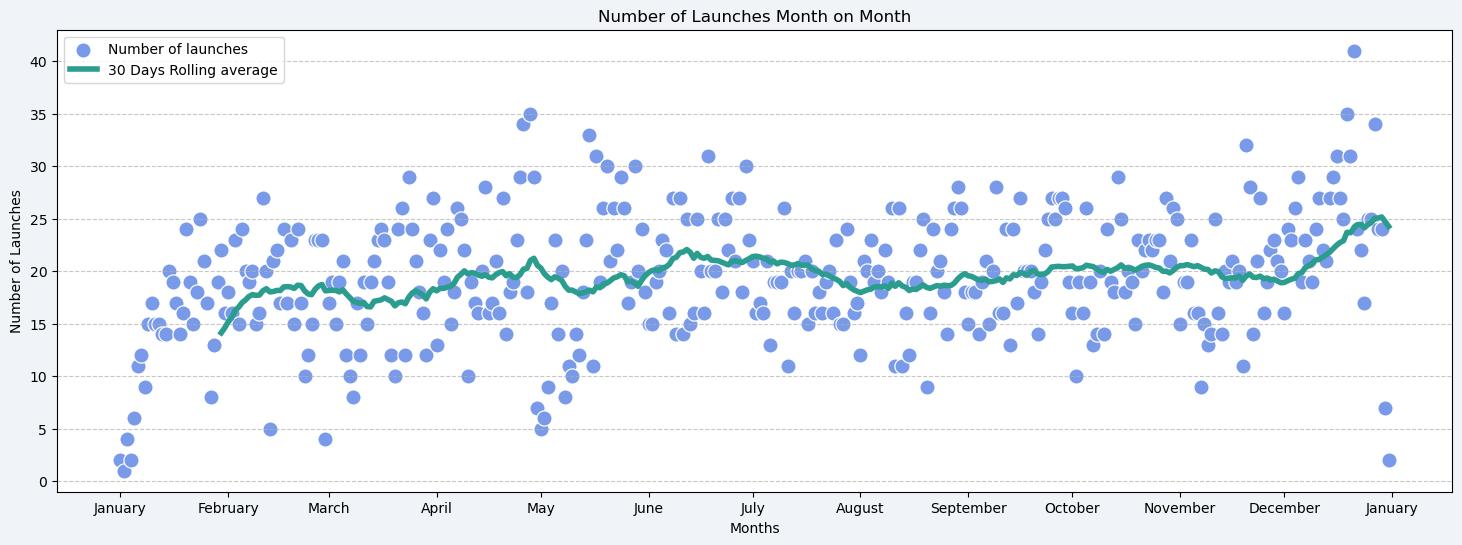

In [106]:
plt.figure(figsize=(18, 6), facecolor='#f0f4f8')

ax = sns.scatterplot(
      data = launches_month_on_month,
      x = 'Date',
	  y = 'Launch_count',
      label = 'Number of launches',
      color = '#799AE8',
      s = 120
)
sns.lineplot(
      data = launches_month_on_month,
      x = 'Date',
	  y = 'Rolling_average',
      label = '30 Days Rolling average',
      color = '#2a9d8f',
      linewidth = 4,
)
plt.xlabel('Months')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Month on Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))
plt.legend(loc='upper left')

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [108]:
launches_month_on_month.groupby('Month')['Launch_count'].sum().sort_values()

Month
1     440
2     528
7     564
3     567
11    567
5     592
8     605
9     614
4     617
10    627
6     636
12    744
Name: Launch_count, dtype: int64

In [109]:
launches_month_on_month.groupby('Month')['Launch_count'].sum().sort_values(ascending=False)

Month
12    744
6     636
10    627
4     617
9     614
8     605
5     592
3     567
11    567
7     564
2     528
1     440
Name: Launch_count, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [111]:
average_launch_price = df_data_clean.groupby(df_data_clean['Date'].dt.year)['Price'].mean()
average_launch_price

Date
1964    63.23
1965    63.23
1966    59.00
1967    59.00
1968    59.00
1969    59.00
1973    20.00
1974    20.00
1975    20.00
1976    20.00
1977    20.00
1978    20.00
1979    20.00
1980    20.00
1981    39.55
1982    46.96
1983    56.48
1984    64.82
1985    98.42
1986    43.77
1987    24.82
1988    41.75
1989    71.48
1990    93.04
1991   109.03
1992   123.67
1993   130.37
1994   125.94
1995   160.45
1996   155.86
1997   158.83
1998   126.14
1999    82.25
2000   103.26
2001   172.89
2002   141.84
2003    69.64
2004    74.99
2005    70.37
2006   104.11
2007   100.59
2008    97.43
2009   119.22
2010    91.52
2011    83.95
2012    74.32
2013    65.15
2014    71.17
2015    64.71
2016    70.65
2017    62.63
2018    61.73
2019    53.04
2020    54.35
2021    50.86
2022    58.08
2023    53.53
2024    54.85
2025    55.69
Name: Price, dtype: float64

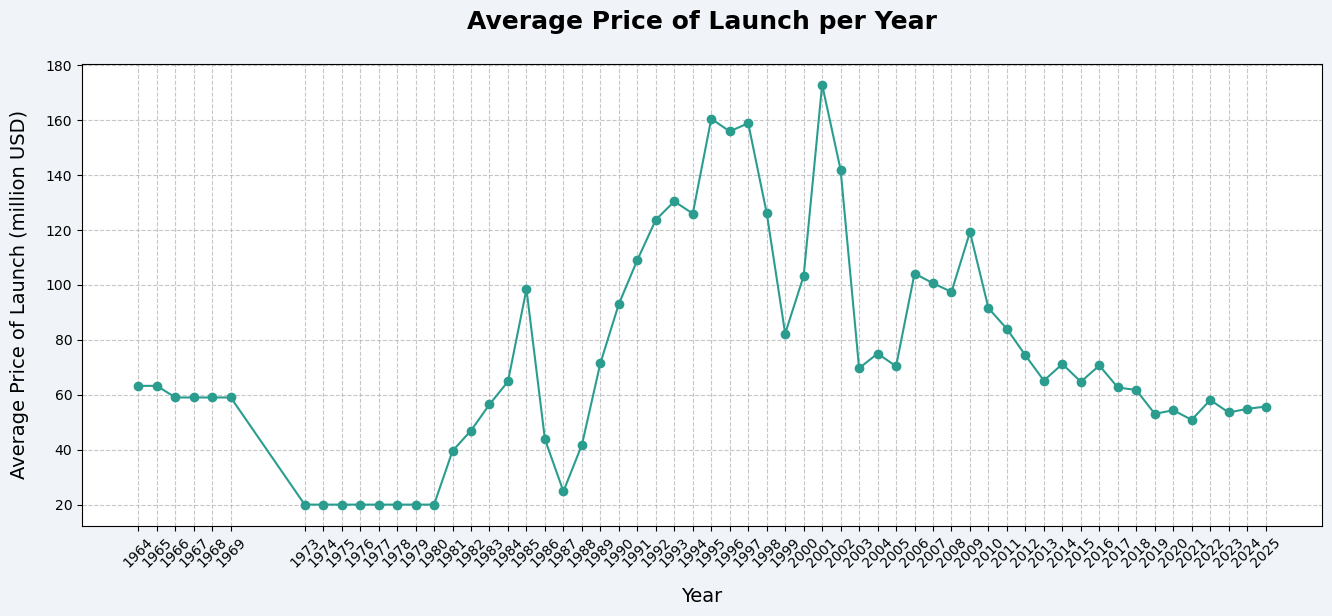

In [112]:
plt.figure(figsize=(16,6), dpi=100, facecolor='#f0f4f8')
plt.plot(average_launch_price, marker='o', linestyle='-', color='#2a9d8f')
plt.title('Average Price of Launch per Year', fontsize=18, fontweight="bold", pad=25)
plt.grid(linestyle='--', alpha=0.7)
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Average Price of Launch (million USD)', fontsize=14, labelpad=12)
plt.xticks(average_launch_price.index, rotation=45)

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [114]:
launches_top10_organisations = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch_count')

In [115]:
top10_organisations = launches_top10_organisations.groupby(['Organisation'])['Launch_count'].sum().sort_values(ascending=False).head(10).reset_index()

In [116]:
launches_top10_organisations = launches_top10_organisations.merge(top10_organisations['Organisation'], on='Organisation', how='inner')
launches_top10_organisations

,Year,Organisation,Launch_count
0,1957,RVSN USSR,2
1,1958,NASA,2
2,1958,RVSN USSR,5
3,1958,US Air Force,2
4,1959,General Dynamics,1
...,...,...,...
328,2025,CASC,28
329,2025,Roscosmos,2
330,2025,SpaceX,80
331,2025,ULA,2


In [117]:
fig = px.bar(launches_top10_organisations, x="Year", y="Launch_count", color="Organisation")
fig.update_layout(title="Number of Launches over Time by Top 10 Organizations")
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [119]:
cold_war_update_ussr = {
    'Russian Federation': 'USSR',
    'Kazakhstan': 'USSR'
}
df_data.loc[(df_data['Date'].dt.year <= 1991), 'Country'] = df_data['Country'].replace(cold_war_update_ussr)

In [120]:
df_coldwar = df_data[df_data["Date"].dt.year <= 1991]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [122]:
total_launches_coldwar = df_coldwar.groupby([df_coldwar['Date'].dt.year.rename('Year'), 'Country']).size().reset_index(name='Launch_count')

In [123]:
total_launches_coldwar_countries = total_launches_coldwar.groupby(['Country'])['Launch_count'].sum()
total_launches_usa_ussr = total_launches_coldwar_countries.loc[total_launches_coldwar_countries.index.isin(['USA', 'USSR'])]
total_launches_usa_ussr

Country
USA     1075
USSR    2478
Name: Launch_count, dtype: int64

In [124]:
fig = px.pie(values=total_launches_usa_ussr.values, names=total_launches_usa_ussr.index, title='Cold War Space Race Total Rocket Launches (USA vs. USSR)')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [126]:
total_launches_year_on_year = total_launches_coldwar.loc[total_launches_coldwar['Country'].isin(['USA', 'USSR'])]
total_launches_year_on_year

,Year,Country,Launch_count
0,1957,USA,1
1,1957,USSR,2
2,1958,USA,23
3,1958,USSR,5
4,1959,USA,20
...,...,...,...
142,1989,USSR,75
147,1990,USA,27
148,1990,USSR,80
153,1991,USA,19


In [127]:
fig = px.bar(x=total_launches_year_on_year["Year"], y=total_launches_year_on_year["Launch_count"], color=total_launches_year_on_year["Country"], title="Total Number of Launches Year-On-Year by the Two Superpowers", barmode='group')
fig.update_xaxes(dtick=1)
fig.update_layout(xaxis_title="Year", yaxis_title="Number of Launches")
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [129]:
mission_status_groupby = df_data.groupby(df_data['Date'].dt.year.rename('Year'))['Mission_Status'].value_counts().reset_index(name='Total_status')
mission_failures_year_on_year = mission_status_groupby[mission_status_groupby['Mission_Status'] == 'Failure']

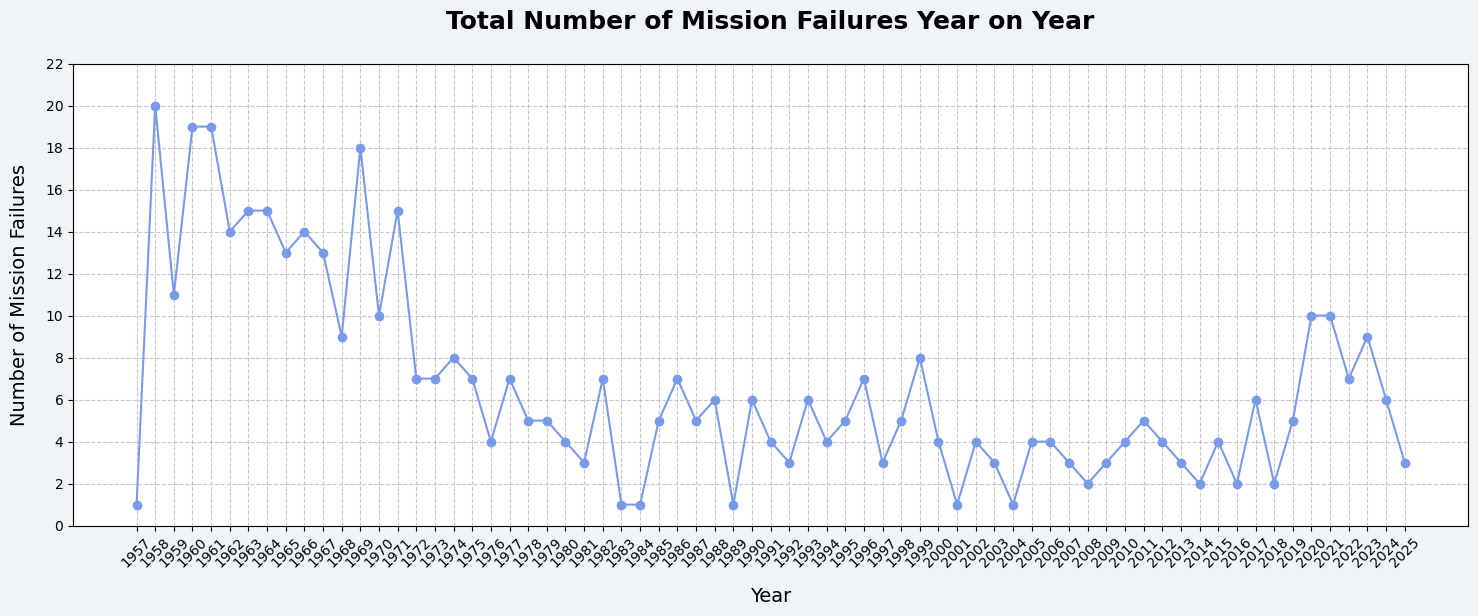

In [130]:
plt.figure(figsize=(18, 6), facecolor='#f0f4f8')
plt.plot(mission_failures_year_on_year['Year'], 
         mission_failures_year_on_year['Total_status'], 
         marker='o', 
         linestyle='-', 
         color='#799AE8'
)
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Number of Mission Failures', fontsize=14, labelpad=12)
plt.title('Total Number of Mission Failures Year on Year', fontsize=18, fontweight="bold", pad=25)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(mission_failures_year_on_year['Year'], rotation=45)
plt.yticks(range(0, 23, 2))
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [132]:
total_missions_yoy = mission_status_groupby.groupby(['Year'])['Total_status'].sum().reset_index(name='Total_missions')

In [133]:
failure_percent_yoy = total_missions_yoy.merge(mission_failures_year_on_year['Total_status'].rename('Total_failures'), on=mission_failures_year_on_year['Year'], how='inner')
failure_percent_yoy.drop('key_0', axis=1, inplace=True)
failure_percent_yoy['Percentage'] = (failure_percent_yoy['Total_failures'] / failure_percent_yoy['Total_missions']) * 100

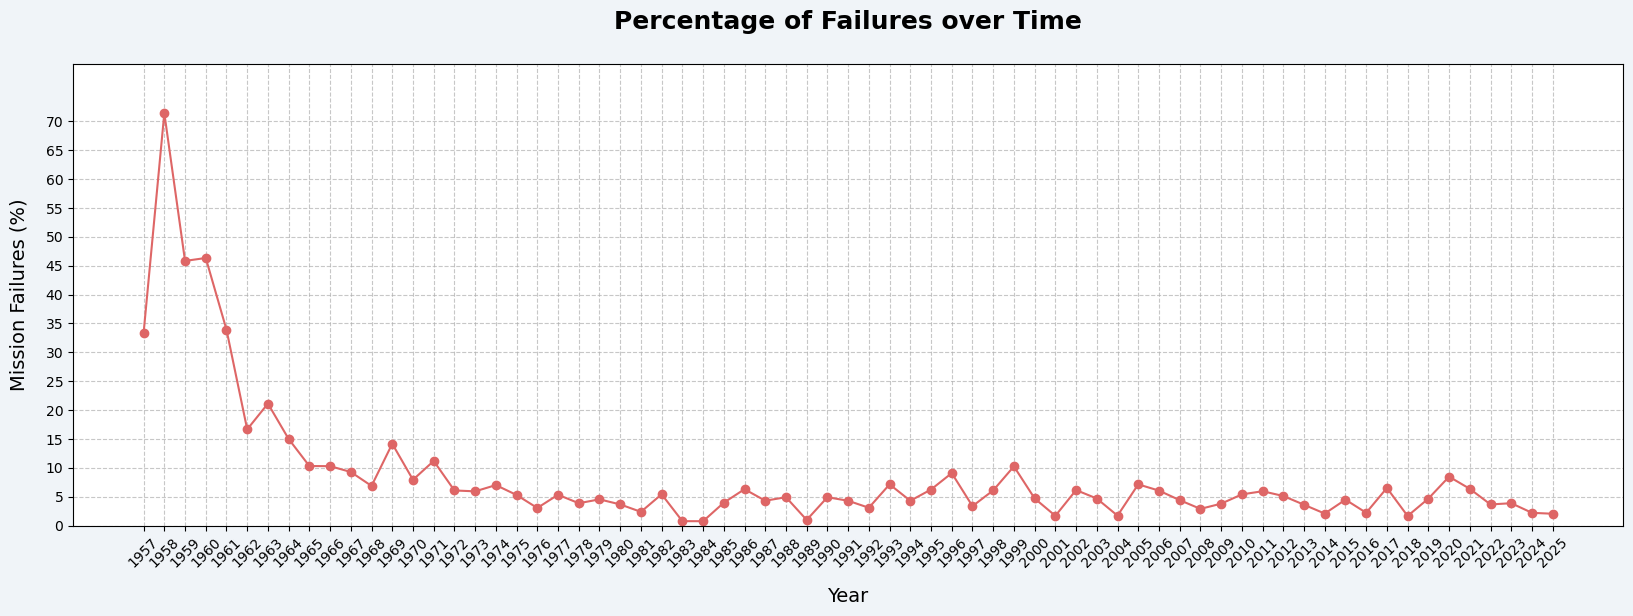

In [134]:
plt.figure(figsize=(20, 6), facecolor='#f0f4f8')
plt.plot(failure_percent_yoy['Year'], failure_percent_yoy['Percentage'], marker='o', linestyle='-', color='#DE6666')
plt.xlabel('Year', fontsize=14, labelpad=12)
plt.ylabel('Mission Failures (%)', fontsize=14, labelpad=12)
plt.title('Percentage of Failures over Time', fontsize=18, fontweight="bold", pad=25)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(failure_percent_yoy['Year'], rotation=45)
plt.ylim(0, 80)
plt.yticks(range(0, 75, 5))
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [136]:
leading_countries_per_year = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Country', 'Mission_Status']).size().reset_index(name='Launch_count')
leading_countries_total_launches_yoy = leading_countries_per_year.groupby(['Year', 'Country'])['Launch_count'].sum().reset_index(name='Launch_count')
leading_countries_total_launches_yoy = leading_countries_total_launches_yoy.loc[leading_countries_total_launches_yoy.groupby('Year')['Launch_count'].idxmax()]
leading_countries_total_launches_yoy.groupby(leading_countries_total_launches_yoy['Country']).size().sort_values(ascending=False)

Country
USA                   30
USSR                  26
Kazakhstan             9
China                  2
Russian Federation     2
dtype: int64

In [137]:
leading_countries_total_successful_launches_yoy = leading_countries_per_year.groupby(['Year', 'Country', 'Mission_Status'])['Launch_count'].sum().reset_index(name='Launch_count')
leading_countries_total_successful_launches_yoy = leading_countries_total_successful_launches_yoy[leading_countries_total_successful_launches_yoy['Mission_Status'] == 'Success']
leading_countries_total_successful_launches_yoy = leading_countries_total_successful_launches_yoy.loc[leading_countries_total_successful_launches_yoy.groupby('Year')['Launch_count'].idxmax()]
leading_countries_total_successful_launches_yoy.groupby(leading_countries_total_successful_launches_yoy['Country']).size().sort_values(ascending=False)

Country
USSR                  26
USA                   25
Kazakhstan            10
China                  6
Russian Federation     2
dtype: int64

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [139]:
launches_per_organisations = df_data.groupby([df_data['Date'].dt.year.rename('Year'), 'Organisation']).size().reset_index(name='Launch_count')
leading_organisatons_launch_yoy = launches_per_organisations.loc[launches_per_organisations.groupby('Year')['Launch_count'].idxmax()]

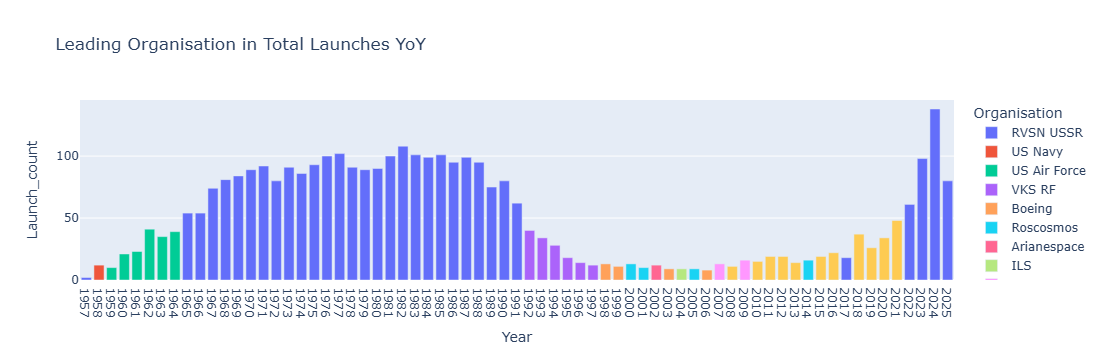

In [140]:
fig = px.bar(leading_organisatons_launch_yoy, x="Year", y="Launch_count", color='Organisation', title='Leading Organisation in Total Launches YoY')
fig.update_xaxes(dtick=1)
fig.show()